In [1]:
import pymysql
from sqlalchemy import create_engine
import pandas as pd
import getpass  # To get the password without showing the input
password = getpass.getpass()

········


In [7]:
connection_string = 'mysql+pymysql://root:' + password + '@localhost/sakila'
engine = create_engine(connection_string)
query = """SELECT f.title AS 'title', f.rental_rate, f.rental_duration, f.length, f.rating, f.special_features, c.name AS 'category'
FROM sakila.film f
JOIN sakila.film_category fc USING(film_id)
JOIN sakila.category c USING(category_id)
ORDER BY title;"""
data = pd.read_sql_query(query, engine)
print(data.shape)
data.head()

(1000, 7)


,title,rental_rate,rental_duration,length,rating,special_features,category
0,ACADEMY DINOSAUR,0.99,6,86,PG,"Deleted Scenes,Behind the Scenes",Documentary
1,ACE GOLDFINGER,4.99,3,48,G,"Trailers,Deleted Scenes",Horror
2,ADAPTATION HOLES,2.99,7,50,NC-17,"Trailers,Deleted Scenes",Documentary
3,AFFAIR PREJUDICE,2.99,5,117,G,"Commentaries,Behind the Scenes",Horror
4,AFRICAN EGG,2.99,6,130,G,Deleted Scenes,Family


In [13]:
query = """SELECT f.title AS 'film_title', COUNT(r.rental_date) as times_rented
FROM sakila.film f
JOIN sakila.inventory i USING(film_id)
JOIN sakila.rental r USING(inventory_id)
WHERE r.rental_date LIKE '%%2005-05%%'
GROUP BY f.title
ORDER BY f.title;"""

target = pd.read_sql_query(query, engine)
print(target.shape)
target.head()

(686, 2)


,film_title,times_rented
0,ACADEMY DINOSAUR,2
1,ADAPTATION HOLES,1
2,AFFAIR PREJUDICE,2
3,AFRICAN EGG,1
4,AGENT TRUMAN,2


In [18]:
target['may_rentals'] = 1

In [19]:
target.head()

,film_title,times_rented,may_rentals
0,ACADEMY DINOSAUR,2,1
1,ADAPTATION HOLES,1,1
2,AFFAIR PREJUDICE,2,1
3,AFRICAN EGG,1,1
4,AGENT TRUMAN,2,1


In [23]:
lst_all = list (data.title)
lst_all

['ACADEMY DINOSAUR',
 'ACE GOLDFINGER',
 'ADAPTATION HOLES',
 'AFFAIR PREJUDICE',
 'AFRICAN EGG',
 'AGENT TRUMAN',
 'AIRPLANE SIERRA',
 'AIRPORT POLLOCK',
 'ALABAMA DEVIL',
 'ALADDIN CALENDAR',
 'ALAMO VIDEOTAPE',
 'ALASKA PHANTOM',
 'ALI FOREVER',
 'ALICE FANTASIA',
 'ALIEN CENTER',
 'ALLEY EVOLUTION',
 'ALONE TRIP',
 'ALTER VICTORY',
 'AMADEUS HOLY',
 'AMELIE HELLFIGHTERS',
 'AMERICAN CIRCUS',
 'AMISTAD MIDSUMMER',
 'ANACONDA CONFESSIONS',
 'ANALYZE HOOSIERS',
 'ANGELS LIFE',
 'ANNIE IDENTITY',
 'ANONYMOUS HUMAN',
 'ANTHEM LUKE',
 'ANTITRUST TOMATOES',
 'ANYTHING SAVANNAH',
 'APACHE DIVINE',
 'APOCALYPSE FLAMINGOS',
 'APOLLO TEEN',
 'ARABIA DOGMA',
 'ARACHNOPHOBIA ROLLERCOASTER',
 'ARGONAUTS TOWN',
 'ARIZONA BANG',
 'ARK RIDGEMONT',
 'ARMAGEDDON LOST',
 'ARMY FLINTSTONES',
 'ARSENIC INDEPENDENCE',
 'ARTIST COLDBLOODED',
 'ATLANTIS CAUSE',
 'ATTACKS HATE',
 'ATTRACTION NEWTON',
 'AUTUMN CROW',
 'BABY HALL',
 'BACKLASH UNDEFEATED',
 'BADMAN DAWN',
 'BAKED CLEOPATRA',
 'BALLOON HOMEWARD

In [24]:
lst_target = list(target.film_title)
lst_target

['ACADEMY DINOSAUR',
 'ADAPTATION HOLES',
 'AFFAIR PREJUDICE',
 'AFRICAN EGG',
 'AGENT TRUMAN',
 'AIRPORT POLLOCK',
 'ALAMO VIDEOTAPE',
 'ALASKA PHANTOM',
 'ALIEN CENTER',
 'ALLEY EVOLUTION',
 'ALONE TRIP',
 'ALTER VICTORY',
 'AMADEUS HOLY',
 'AMERICAN CIRCUS',
 'ANACONDA CONFESSIONS',
 'ANGELS LIFE',
 'ANNIE IDENTITY',
 'ANTHEM LUKE',
 'ANTITRUST TOMATOES',
 'ANYTHING SAVANNAH',
 'APACHE DIVINE',
 'ARABIA DOGMA',
 'ARMAGEDDON LOST',
 'ARMY FLINTSTONES',
 'ARTIST COLDBLOODED',
 'ATLANTIS CAUSE',
 'ATTRACTION NEWTON',
 'AUTUMN CROW',
 'BABY HALL',
 'BACKLASH UNDEFEATED',
 'BAKED CLEOPATRA',
 'BALLOON HOMEWARD',
 'BALLROOM MOCKINGBIRD',
 'BANGER PINOCCHIO',
 'BARBARELLA STREETCAR',
 'BAREFOOT MANCHURIAN',
 'BASIC EASY',
 'BEACH HEARTBREAKERS',
 'BEAR GRACELAND',
 'BEAST HUNCHBACK',
 'BEAUTY GREASE',
 'BEDAZZLED MARRIED',
 'BEHAVIOR RUNAWAY',
 'BERETS AGENT',
 'BETRAYED REAR',
 'BIKINI BORROWERS',
 'BILKO ANONYMOUS',
 'BINGO TALENTED',
 'BIRD INDEPENDENCE',
 'BIRDS PERDITION',
 'BLACKOUT 

In [26]:
lst_not_may = []
for title in lst_all:
    if title not in lst_target:
        lst_not_may.append(title)

In [28]:
len(lst_not_may)

314

In [29]:
not_may = pd.DataFrame(lst_not_may)

In [30]:
not_may.head()

,0
0,ACE GOLDFINGER
1,AIRPLANE SIERRA
2,ALABAMA DEVIL
3,ALADDIN CALENDAR
4,ALI FOREVER


In [31]:
not_may['may_rentals'] = 0

In [32]:
not_may

,0,may_rentals
0,ACE GOLDFINGER,0
1,AIRPLANE SIERRA,0
2,ALABAMA DEVIL,0
3,ALADDIN CALENDAR,0
4,ALI FOREVER,0
...,...,...
309,WORKER TARZAN,0
310,WORLD LEATHERNECKS,0
311,WRONG BEHAVIOR,0
312,YOUNG LANGUAGE,0


In [33]:
not_may['times_rented'] = 0

In [34]:
not_may = not_may.rename(columns = {0:'film_title'}) #renaiming columns. 

In [35]:
not_may

,film_title,may_rentals,times_rented
0,ACE GOLDFINGER,0,0
1,AIRPLANE SIERRA,0,0
2,ALABAMA DEVIL,0,0
3,ALADDIN CALENDAR,0,0
4,ALI FOREVER,0,0
...,...,...,...
309,WORKER TARZAN,0,0
310,WORLD LEATHERNECKS,0,0
311,WRONG BEHAVIOR,0,0
312,YOUNG LANGUAGE,0,0


In [36]:
not_may = not_may [['film_title', 'times_rented', 'may_rentals']]
not_may #reordering columns

,film_title,times_rented,may_rentals
0,ACE GOLDFINGER,0,0
1,AIRPLANE SIERRA,0,0
2,ALABAMA DEVIL,0,0
3,ALADDIN CALENDAR,0,0
4,ALI FOREVER,0,0
...,...,...,...
309,WORKER TARZAN,0,0
310,WORLD LEATHERNECKS,0,0
311,WRONG BEHAVIOR,0,0
312,YOUNG LANGUAGE,0,0


In [38]:
final_target = pd.concat([target,not_may], ignore_index = True)
final_target

,film_title,times_rented,may_rentals
0,ACADEMY DINOSAUR,2,1
1,ADAPTATION HOLES,1,1
2,AFFAIR PREJUDICE,2,1
3,AFRICAN EGG,1,1
4,AGENT TRUMAN,2,1
...,...,...,...
995,WORKER TARZAN,0,0
996,WORLD LEATHERNECKS,0,0
997,WRONG BEHAVIOR,0,0
998,YOUNG LANGUAGE,0,0


In [39]:
final_target = final_target.sort_values('film_title').reset_index() #sort in alphabetical order. 

In [40]:
final_target

,index,film_title,times_rented,may_rentals
0,0,ACADEMY DINOSAUR,2,1
1,686,ACE GOLDFINGER,0,0
2,1,ADAPTATION HOLES,1,1
3,2,AFFAIR PREJUDICE,2,1
4,3,AFRICAN EGG,1,1
...,...,...,...,...
995,998,YOUNG LANGUAGE,0,0
996,999,YOUTH KICK,0,0
997,683,ZHIVAGO CORE,1,1
998,684,ZOOLANDER FICTION,1,1


In [41]:
final_target = final_target.drop(['index','film_title'], axis = 1) #dropping columns. 

In [42]:
final_target

,times_rented,may_rentals
0,2,1
1,0,0
2,1,1
3,2,1
4,1,1
...,...,...
995,0,0
996,0,0
997,1,1
998,1,1


In [47]:
may_data = pd.concat([final_target,data], axis = 1)
may_data #concatinating final_target with data.

,times_rented,may_rentals,title,rental_rate,rental_duration,length,rating,special_features,category
0,2,1,ACADEMY DINOSAUR,0.99,6,86,PG,"Deleted Scenes,Behind the Scenes",Documentary
1,0,0,ACE GOLDFINGER,4.99,3,48,G,"Trailers,Deleted Scenes",Horror
2,1,1,ADAPTATION HOLES,2.99,7,50,NC-17,"Trailers,Deleted Scenes",Documentary
3,2,1,AFFAIR PREJUDICE,2.99,5,117,G,"Commentaries,Behind the Scenes",Horror
4,1,1,AFRICAN EGG,2.99,6,130,G,Deleted Scenes,Family
...,...,...,...,...,...,...,...,...,...
995,0,0,YOUNG LANGUAGE,0.99,6,183,G,"Trailers,Behind the Scenes",Documentary
996,0,0,YOUTH KICK,0.99,4,179,NC-17,"Trailers,Behind the Scenes",Music
997,1,1,ZHIVAGO CORE,0.99,6,105,NC-17,Deleted Scenes,Horror
998,1,1,ZOOLANDER FICTION,2.99,5,101,R,"Trailers,Deleted Scenes",Children


In [48]:
may_data.isna().sum() #looking for null values

times_rented        0
may_rentals         0
title               0
rental_rate         0
rental_duration     0
length              0
rating              0
special_features    0
category            0
dtype: int64

In [53]:
import seaborn as sns

In [60]:
may_data.dtypes #splitting my numericals and catagoricals. 

times_rented          int64
may_rentals           int64
title                object
rental_rate         float64
rental_duration       int64
length                int64
rating               object
special_features     object
category             object
dtype: object

In [86]:
may_data = may_data.drop(['title', 'special_features'], axis = 1) #dropping columns. 

In [87]:
may_data

,times_rented,may_rentals,rental_rate,rental_duration,length,rating,category
0,2,1,0.99,6,86,PG,Documentary
1,0,0,4.99,3,48,G,Horror
2,1,1,2.99,7,50,NC-17,Documentary
3,2,1,2.99,5,117,G,Horror
4,1,1,2.99,6,130,G,Family
...,...,...,...,...,...,...,...
995,0,0,0.99,6,183,G,Documentary
996,0,0,0.99,4,179,NC-17,Music
997,1,1,0.99,6,105,NC-17,Horror
998,1,1,2.99,5,101,R,Children


In [88]:
numerical = may_data.select_dtypes('number')

In [89]:
catagorical = may_data.select_dtypes('object')

In [90]:
numerical

,times_rented,may_rentals,rental_rate,rental_duration,length
0,2,1,0.99,6,86
1,0,0,4.99,3,48
2,1,1,2.99,7,50
3,2,1,2.99,5,117
4,1,1,2.99,6,130
...,...,...,...,...,...
995,0,0,0.99,6,183
996,0,0,0.99,4,179
997,1,1,0.99,6,105
998,1,1,2.99,5,101


In [91]:
catagorical

,rating,category
0,PG,Documentary
1,G,Horror
2,NC-17,Documentary
3,G,Horror
4,G,Family
...,...,...
995,G,Documentary
996,NC-17,Music
997,NC-17,Horror
998,R,Children


In [92]:
correlations = numerical.corr()

In [93]:
correlations #looking for correlations 

,times_rented,may_rentals,rental_rate,rental_duration,length
times_rented,1.000000,0.742446,-0.032559,-0.048214,-0.007575
may_rentals,0.742446,1.000000,-0.019824,-0.065222,0.010153
rental_rate,-0.032559,-0.019824,1.000000,0.025777,0.029789
rental_duration,-0.048214,-0.065222,0.025777,1.000000,0.061586
length,-0.007575,0.010153,0.029789,0.061586,1.000000


NameError: name 'plt' is not defined

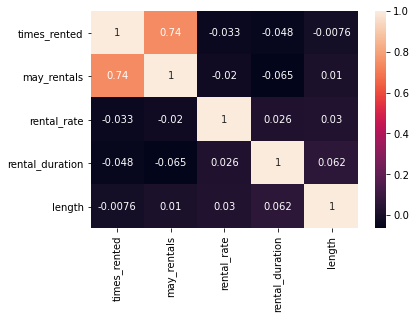

In [94]:
sns.heatmap(correlations, annot=True)
plt.show()

In [95]:
y = may_data['may_rentals']
X = may_data.drop('may_rentals', axis=1)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1337) #X,y split. 

In [96]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

In [97]:
X_train_num = X_train.select_dtypes(include = np.number)

In [98]:
transformer = MinMaxScaler().fit(X_train_num)
X_train_normalized = transformer.transform(X_train_num)
X_train_norm = pd.DataFrame(X_train_normalized)

In [99]:
X_train_norm.columns = X_train_num.columns
X_train_norm.head()

,times_rented,rental_rate,rental_duration,length
0,0.2,1.0,0.50,0.769784
1,0.2,0.0,0.75,0.151079
2,0.2,0.5,0.00,0.258993
3,0.8,1.0,0.50,0.223022
4,0.4,0.0,0.25,0.733813


In [102]:
X_train_categorical = X_train.select_dtypes(include = np.object)
X_train_cat = pd.get_dummies(X_train_categorical, 
                             columns=['rating', 'category'],
                             drop_first=True)
X_train_cat.head()

<ipython-input-102-e18ca9137922>:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  X_train_categorical = X_train.select_dtypes(include = np.object)


,rating_NC-17,rating_PG,rating_PG-13,rating_R,category_Animation,category_Children,category_Classics,category_Comedy,category_Documentary,category_Drama,category_Family,category_Foreign,category_Games,category_Horror,category_Music,category_New,category_Sci-Fi,category_Sports,category_Travel
46,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
789,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
722,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
283,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
39,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [104]:
X_train_changed = np.concatenate([X_train_norm, X_train_cat], axis=1)

In [105]:
from sklearn.linear_model import LogisticRegression
classification = LogisticRegression(random_state=0, solver='lbfgs',
                  multi_class='multinomial').fit(X_train_changed, y_train)

In [106]:
classification = LogisticRegression(random_state=0, solver='saga',
                  multi_class='multinomial').fit(X_train_changed, y_train)

In [107]:
X_test_num = X_test.select_dtypes(include = np.number)

In [108]:
X_test_normalized = transformer.transform(X_test_num)
X_test_norm = pd.DataFrame(X_test_normalized)

In [110]:
X_test_categorical = X_test.select_dtypes(include = np.object)
X_test_cat = pd.get_dummies(X_test_categorical, 
                            columns=['rating', 'category'],
                            drop_first=True)
#display(list(zip(list(X_train_cat.columns),list(X_test_cat.columns))))
X_test_cat.head()

<ipython-input-110-6f4da9387fd3>:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  X_test_categorical = X_test.select_dtypes(include = np.object)


,rating_NC-17,rating_PG,rating_PG-13,rating_R,category_Animation,category_Children,category_Classics,category_Comedy,category_Documentary,category_Drama,category_Family,category_Foreign,category_Games,category_Horror,category_Music,category_New,category_Sci-Fi,category_Sports,category_Travel
977,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
15,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
56,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
801,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
747,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [111]:
X_test_changed = np.concatenate([X_test_norm, X_test_cat], axis=1)

In [113]:
predictions = classification.predict(X_test_changed)
classification.score(X_test_changed, y_test) #what? how is this 1? I also don't see any high correlations in my heatmap..

1.0

In [114]:
print(y_test.value_counts())

1    138
0     62
Name: may_rentals, dtype: int64


In [115]:
pd.Series(predictions).value_counts()

1    138
0     62
dtype: int64

In [116]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predictions)

array([[ 62,   0],
       [  0, 138]])